In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import alphalens
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DATA_DIR = 'D:/Data/index/'

In [10]:
fname = '%s/881001.WI.xlsx'%(DATA_DIR)
wdf = pd.read_excel(fname)

In [4]:
files = [f for f in os.listdir(DATA_DIR) if f.startswith('CI')]

In [5]:
dic = {}
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    temp = pd.read_excel(fname)
    dic[f.rstrip('.xlsx')] = temp['close']
df = pd.DataFrame(dic)

In [7]:
df = df.dropna()

In [8]:
df.head()

,CI005001.WI,CI005002.WI,CI005003.WI,CI005004.WI,CI005005.WI,CI005006.WI,CI005007.WI,CI005008.WI,CI005009.WI,CI005010.WI,...,CI005020.WI,CI005021.WI,CI005022.WI,CI005023.WI,CI005024.WI,CI005025.WI,CI005026.WI,CI005027.WI,CI005028.WI,CI005029.WI
2004-12-31,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,...,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
2005-01-04,972.6953,971.6588,974.9029,983.8077,976.2269,984.1301,985.7494,988.6503,984.3312,983.9793,...,990.2624,984.9190,971.4580,993.1926,986.6346,992.7887,989.8816,997.8527,1001.2205,997.1057
2005-01-05,972.4125,976.6908,988.5014,993.2399,983.7726,994.4515,1001.7736,1003.5723,997.8509,999.6678,...,1005.2765,975.7218,991.0295,1018.1711,996.0323,1009.8923,1005.5461,1026.2292,1040.0349,1019.9167
2005-01-06,953.4392,957.3087,965.2290,979.5781,969.9842,983.2128,993.2242,990.7411,994.4649,991.6098,...,994.1639,965.1899,992.4178,1017.2031,992.8979,1001.3624,989.5672,1024.9278,1039.1674,1013.4837
2005-01-07,954.5805,920.7459,963.1241,977.8708,969.1005,985.9675,1000.5584,994.2298,998.8018,990.2740,...,1001.1542,965.4274,1000.2445,1035.1659,991.2206,1018.5846,990.8038,1021.6451,1034.9097,1019.1937


# 取月度收益率

In [332]:
codes = ['CI005022.WI', 'CI005002.WI', 'CI005011.WI', 'CI005016.WI', 'CI005014.WI', 'CI005025.WI', 'CI005004.WI']

In [365]:
mon_ret_df = df[codes].resample('Q').last().pct_change()

# 相对于万得全A的超额收益

In [366]:
acc_ret_df = mon_ret_df.subtract(wdf['close'].resample('Q').last().pct_change(), axis='index')

In [367]:
acc_ret_df = acc_ret_df.dropna()

In [368]:
acc_ret_df.head()

,CI005022.WI,CI005002.WI,CI005011.WI,CI005016.WI,CI005014.WI,CI005025.WI,CI005004.WI
2005-03-31,-0.140639,0.000280,-0.066973,-0.010346,0.021441,0.021693,-0.015631
2005-06-30,0.212172,-0.096174,0.003337,0.029709,0.039062,0.009436,0.063931
2005-09-30,-0.118344,-0.061134,0.091453,-0.075987,0.022433,0.028168,-0.063492
2005-12-31,0.013748,-0.095053,-0.003840,0.009779,-0.016425,-0.058006,-0.059738
2006-03-31,0.231629,0.002962,-0.026096,-0.075144,-0.014267,-0.117401,-0.153115


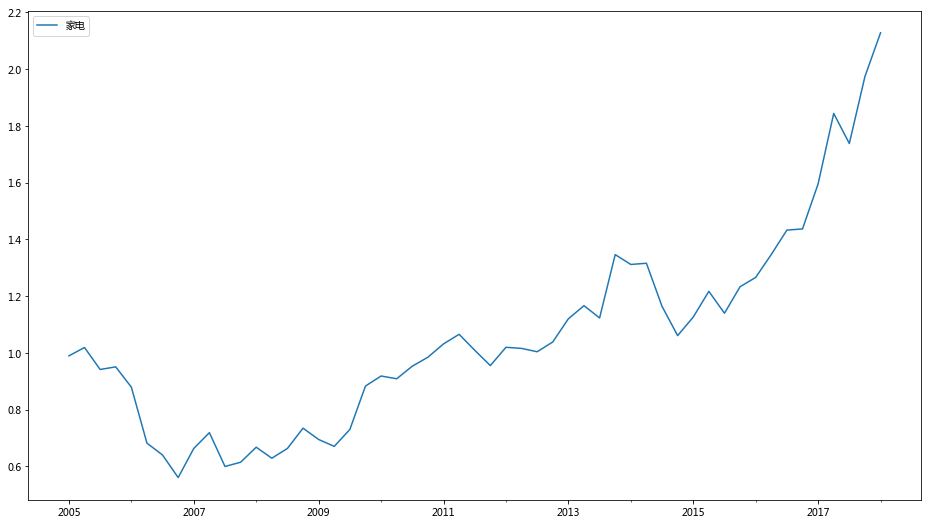

In [369]:
plt.figure(figsize=(16, 9))
(1+acc_ret_df['CI005016.WI']).cumprod().plot(label=u'家电')
plt.legend()

# 转移概率矩阵的计算

In [370]:
def transition_matrix(labels, n):
    M = [[0]*n for _ in range(n)]
    for (i,j) in zip(labels, labels[1:]):
        M[i][j] += 1
    for row in M:
        m = sum(row)
        if m > 0:
            row[:] = [x*1./m for x in row]
    Mdf = pd.DataFrame(M, index=range(n), columns=range(n))
    return Mdf

In [371]:
affprop = sklearn.cluster.AffinityPropagation()
affprop.fit(acc_ret_df.rank(pct=True, axis=1))

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [372]:
affprop.labels_

array([0, 1, 5, 7, 3, 1, 4, 3, 2, 3, 3, 4, 4, 3, 1, 4, 6, 3, 2, 0, 5, 5, 5,
       6, 3, 3, 0, 1, 7, 1, 6, 7, 5, 4, 5, 7, 4, 7, 5, 1, 4, 2, 5, 4, 7, 6,
       3, 3, 6, 7, 6, 7, 0], dtype=int64)

In [373]:
tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)

In [374]:
tran

,0,1,2,3,4,5,6,7
0,0.000000,0.666667,0.000,0.000000,0.000,0.333333,0.000000,0.000000
1,0.000000,0.000000,0.000,0.000000,0.500,0.166667,0.166667,0.166667
2,0.333333,0.000000,0.000,0.333333,0.000,0.333333,0.000000,0.000000
3,0.100000,0.200000,0.200,0.300000,0.100,0.000000,0.100000,0.000000
4,0.000000,0.000000,0.125,0.250000,0.125,0.125000,0.125000,0.250000
5,0.000000,0.125000,0.000,0.000000,0.250,0.250000,0.125000,0.250000
6,0.000000,0.000000,0.000,0.500000,0.000,0.000000,0.000000,0.500000
7,0.125000,0.125000,0.000,0.125000,0.125,0.250000,0.250000,0.000000


# 计算下期预期收益

In [375]:
label = affprop.labels_[-1]
prob = tran.loc[label].values
pred = affprop.cluster_centers_.T.dot(prob)

In [376]:
pd.Series(pred, index=acc_ret_df.columns).sort_values(ascending=False)

CI005004.WI    0.761905
CI005014.WI    0.761905
CI005022.WI    0.761905
CI005025.WI    0.619048
CI005016.WI    0.523810
CI005011.WI    0.428571
CI005002.WI    0.142857
dtype: float64

# 滚动计算历史预测

In [387]:
W = 40
pred_df = pd.DataFrame(index=acc_ret_df.index, columns=acc_ret_df.columns)
for i, date in enumerate(acc_ret_df.index):
    past_return = acc_ret_df[acc_ret_df.index <= date][-W:]
    if past_return.shape[0] >= W:
        past_return = past_return.rank(pct=True, axis=1)
        affprop = sklearn.cluster.AffinityPropagation()
        affprop.fit(past_return)
        label = affprop.labels_[-1]
        tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)
        prob = tran.loc[label].values
        pred = affprop.cluster_centers_.T.dot(prob)
        pred_df.loc[date] = pred

In [388]:
pred_df.dropna().head()

,CI005022.WI,CI005002.WI,CI005011.WI,CI005016.WI,CI005014.WI,CI005025.WI,CI005004.WI
2014-12-31,0.607143,0.428571,0.642857,0.678571,0.607143,0.464286,0.571429
2015-03-31,0.619048,0.5,0.559524,0.607143,0.547619,0.642857,0.52381
2015-06-30,0.809524,0.904762,0.190476,0.52381,0.47619,0.619048,0.47619
2015-09-30,0.583333,0.452381,0.607143,0.583333,0.630952,0.607143,0.535714
2015-12-31,0.571429,0.535714,0.535714,0.589286,0.625,0.607143,0.535714


In [389]:
pred_df.iloc[-1].sort_values(ascending=False)

CI005025.WI    0.857143
CI005016.WI    0.666667
CI005011.WI    0.571429
CI005004.WI    0.547619
CI005022.WI     0.52381
CI005014.WI     0.47619
CI005002.WI    0.357143
Name: 2018-03-31 00:00:00, dtype: object

# 验证预测因子

In [390]:
pred_df = pred_df.dropna()
pricing = df[df.index >= pred_df.index[0]].resample('M').last()

In [391]:
factor_df = pred_df.stack()
factor_df.index = factor_df.index.set_names(['date', 'asset'])

In [392]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df, pricing, quantiles=5, periods=(1,2,3))

Dropped 14.3% entries from factor data (7.1% after in forward returns computation and 7.1% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [393]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

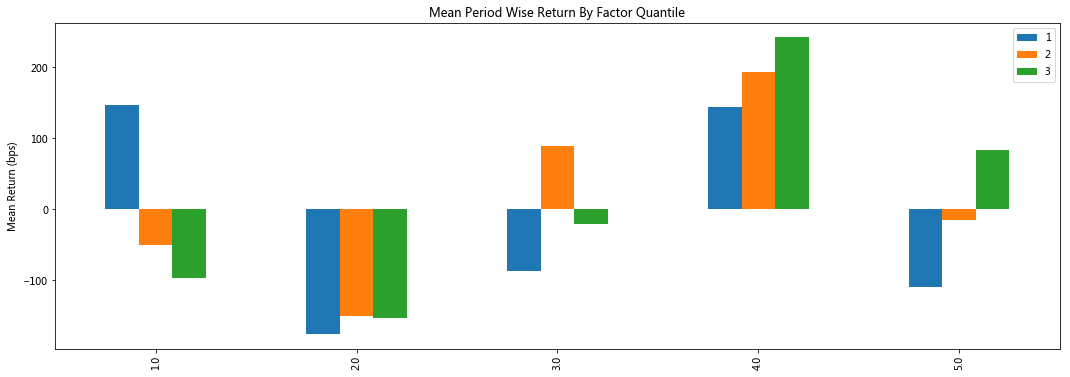

In [394]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

In [395]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

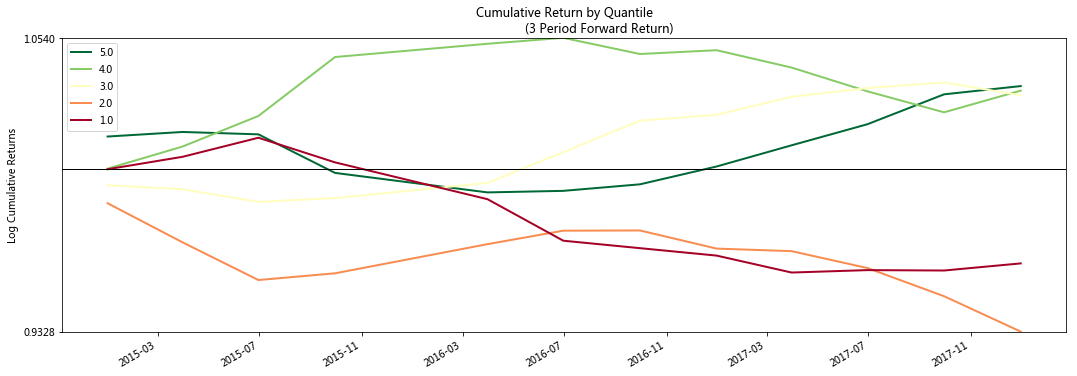

In [396]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period=3)

# 计算各行业每次预测在行业排名前10名的准确率

In [312]:
ydf = df.resample('M').last().pct_change()

In [313]:
ydf = ydf.rank(ascending=False, axis=1)

In [314]:
ydf[ydf <= 10] = 1
ydf[ydf > 10] = 0

In [315]:
pred_y = pred_df.rank(ascending=False, axis=1)

In [316]:
pred_y[pred_y <= 10] = 1
pred_y[pred_y > 10] = 0

In [317]:
pred_y = pred_y.shift(1).dropna()

In [318]:
ydf = ydf[ydf.index >= pred_y.index[0]]

In [319]:
(ydf == pred_y).sum() / ydf.shape[0]

CI005001.WI    0.555556
CI005002.WI    0.585859
CI005003.WI    0.616162
CI005004.WI    0.585859
CI005005.WI    0.656566
CI005006.WI    0.575758
CI005007.WI    0.646465
CI005008.WI    0.616162
CI005009.WI    0.616162
CI005010.WI    0.606061
CI005011.WI    0.575758
CI005012.WI    0.606061
CI005013.WI    0.474747
CI005014.WI    0.616162
CI005015.WI    0.414141
CI005016.WI    0.494949
CI005017.WI    0.585859
CI005018.WI    0.515152
CI005019.WI    0.494949
CI005020.WI    0.545455
CI005021.WI    0.545455
CI005022.WI    0.505051
CI005023.WI    0.494949
CI005024.WI    0.676768
CI005025.WI    0.444444
CI005026.WI    0.474747
CI005027.WI    0.454545
CI005028.WI    0.646465
CI005029.WI    0.585859
dtype: float64

In [331]:
((ydf * pred_y).sum(axis=1) / 10).mean()

0.3484848484848484

In [320]:
((ydf == pred_y).sum() / ydf.shape[0]).mean()

0.5590386624869383

In [321]:
rdf = df.resample('M').last().pct_change()
rdf = rdf[rdf.index >= pred_y.index[0]]

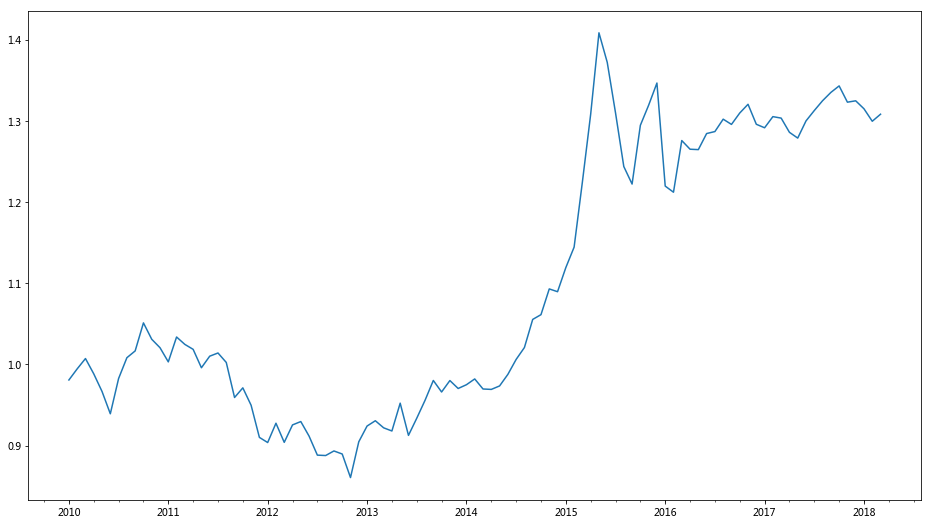

In [325]:
(1 + (rdf * pred_y).mean(axis=1)).cumprod().plot(figsize=(16, 9))